# Comparación de Muestras en Python

Se elaborará una función en Python que permitirá comparar dos muestras. Estas pueden ser:

- Dos muestras provenientes de distribuciones teóricas.
- Una muestra teórica y una muestra a partir de datos.
- Dos muestras provenientes de datos.

In [1003]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')


### 1. **Funciones de densidad** $ f_1 $ y $ f_2 $.

In [1004]:
# Definir la distribución normal como la primera distribución
dist1 = sps.norm(loc=0, scale=1)  # Normal estándar (media=0, desviación estándar=1)
data1 = dist1.rvs(size=1000)  # Muestras de la distribución normal

# Distribución t de Student (con 10 grados de libertad)
dist2 = sps.t(df=10)  # 10 grados de libertad
data2 = dist2.rvs(size=1000)  # Muestras de la distribución t de Student

# # Distribución log-normal (con parámetro sigma=1)
# dist2 = sps.lognorm(sigma=1)  # Log-normal con parámetro sigma=1
# data2 = dist2.rvs(size=1000)  # Muestras de la distribución log-normal

# # Distribución Beta (con parámetros alpha=2, beta=2)
# dist2 = sps.beta(2., 2.)  # Distribución Beta
# data2 = dist2.rvs(size=1000)  # Muestras de la distribución Beta

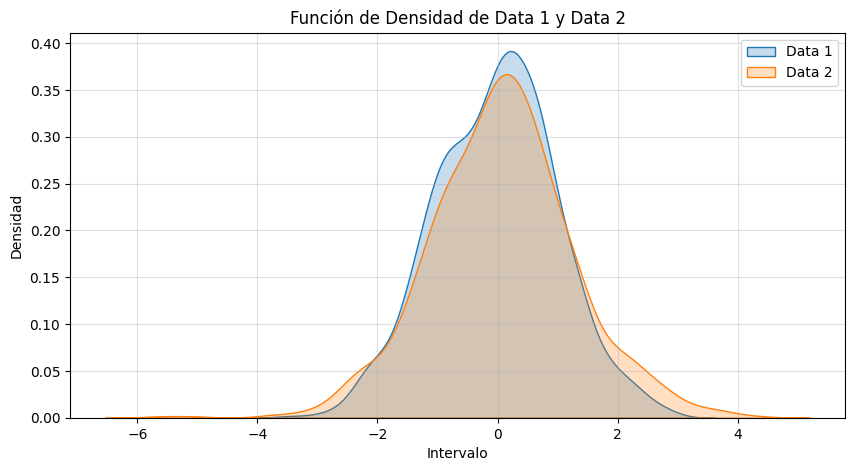

In [1005]:
plt.figure(figsize=(10, 5))

# Graficar las distribuciones de densidad para ambos conjuntos de datos
sns.kdeplot(data1, label='Data 1', shade=True)
sns.kdeplot(data2, label='Data 2', shade=True)

plt.ylabel("Densidad")
plt.xlabel("Intervalo")
plt.title("Función de Densidad de Data 1 y Data 2")
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()

### 2. **Funciones de distribución** $ F_1 $ y $ F_2 $.

In [1006]:
def ecdf(a):
  x, counts = np.unique(a, return_counts=True)
  cusum = np.cumsum(counts)
  return x, cusum / cusum[-1]

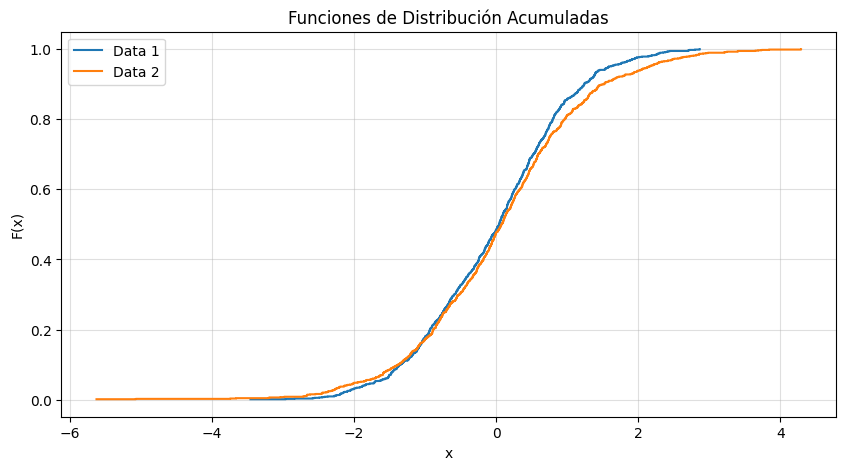

In [1007]:
x1, y1 = ecdf(data1)
x2, y2 = ecdf(data2)

plt.figure(figsize=(10, 5))

plt.plot(x1, y1, label='Data 1', drawstyle='steps-post')
plt.plot(x2, y2, label='Data 2', drawstyle='steps-post')
plt.grid(True, alpha=0.4)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()
plt.title("Funciones de Distribución Acumuladas")
plt.show()

### 3. **Gráfica PP (prob-prob)**.

Se comprara la distribución 1 con la muestra de datos 2.

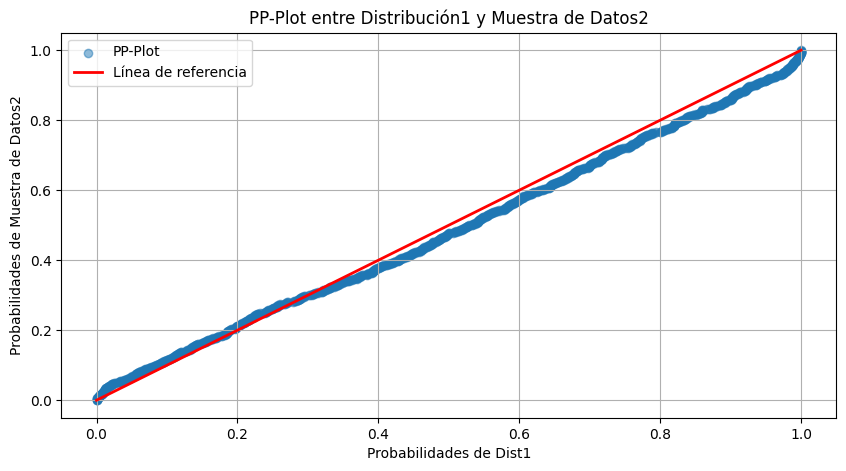

In [1008]:
cdf2 = np.sort(data2)

# Evaluar la CDF de dist1 en los valores de data2
pp_x = dist1.cdf(cdf2)
pp_y = np.linspace(0, 1, len(cdf2))

plt.figure(figsize=(10, 5))
plt.scatter(pp_x, pp_y, alpha=0.5, label="PP-Plot")
plt.plot([0, 1], [0, 1], 'r-', lw=2, label="Línea de referencia")
plt.grid(True)
plt.legend()
plt.title("PP-Plot entre Distribución1 y Muestra de Datos2")
plt.xlabel("Probabilidades de Dist1")
plt.ylabel("Probabilidades de Muestra de Datos2")
plt.show()

### 4. **Gráfica QQ (quantil-quantil)**.

Se comparan las 2 muestras de 2 distribuciones.

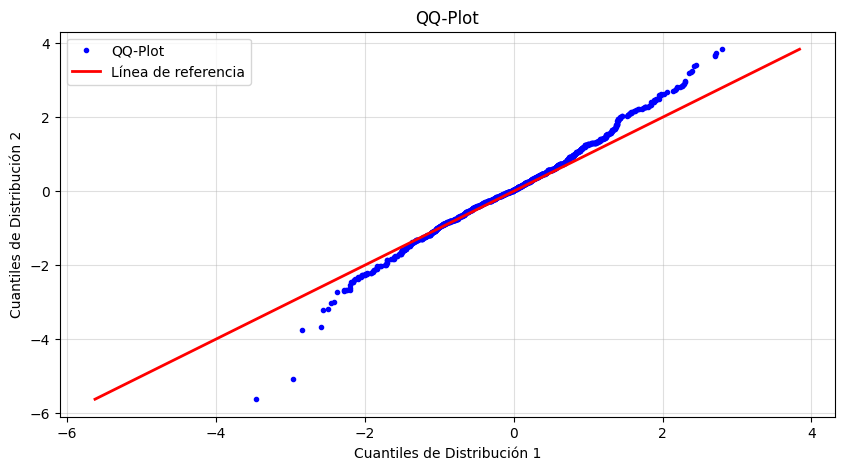

In [1009]:
# Probabilidad por cuantil
qqs = np.linspace(0., 1., 1001)[:-1]
qq1 = np.quantile(data1, qqs)
qq2 = np.quantile(data2, qqs)

# Minimos y máximos para la línea de referencia
minq = min(qq1.min(), qq2.min())
maxq = max(qq1.max(), qq2.max())

plt.figure(figsize=(10, 5))
plt.plot(qq1, qq2, 'b.', drawstyle='steps-post', label="QQ-Plot")
plt.plot([minq,maxq], [minq,maxq], 'r-', lw=2,label="Línea de referencia")
plt.grid(True, alpha=0.4)
plt.title('QQ-Plot')
plt.xlabel('Cuantiles de Distribución 1')
plt.ylabel('Cuantiles de Distribución 2')
plt.legend()
plt.show()

## Prueba de hipótesis de Kolmogorov-Smirnov

Además, se calculará la **distancia de Kolmogorov-Smirnov (KS)** y se ilustrará en las gráficas de densidad y de distribución el punto donde se alcanza esta distancia KS para 2 muestras de datos de dos distribuciones distintas.

| Distancia Máxima | P-valor | Interpretación |
|------------------|---------|---------------|
| **Alta** | **Pequeño** | Distribuciones **diferentes** (evidencia fuerte) |
| **Alta** | **Grande** | Distribuciones **parecen diferentes, pero podría ser por azar** |
| **Pequeña** | **Pequeño** | Distribuciones **similares, pero podría haber una diferencia sutil** |
| **Pequeña** | **Grande** | Distribuciones **prácticamente iguales** |

Estadístico KS: 0.06
P-valor: 0.09
Punto donde ocurre la máxima diferencia KS: 0.90


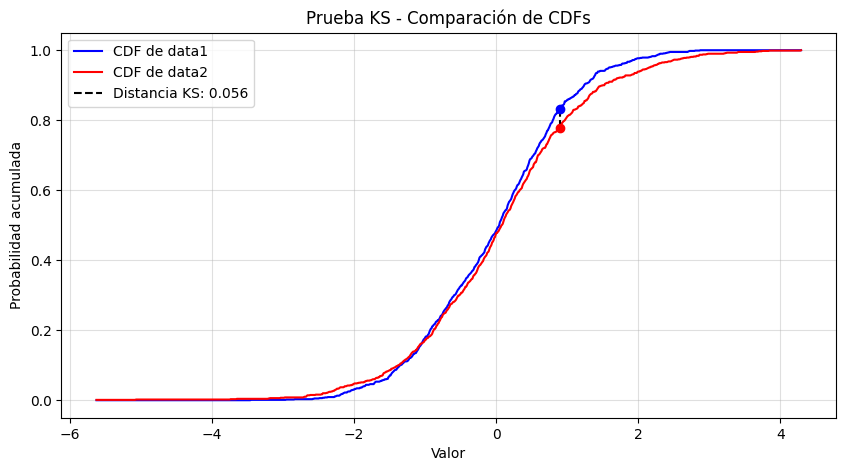

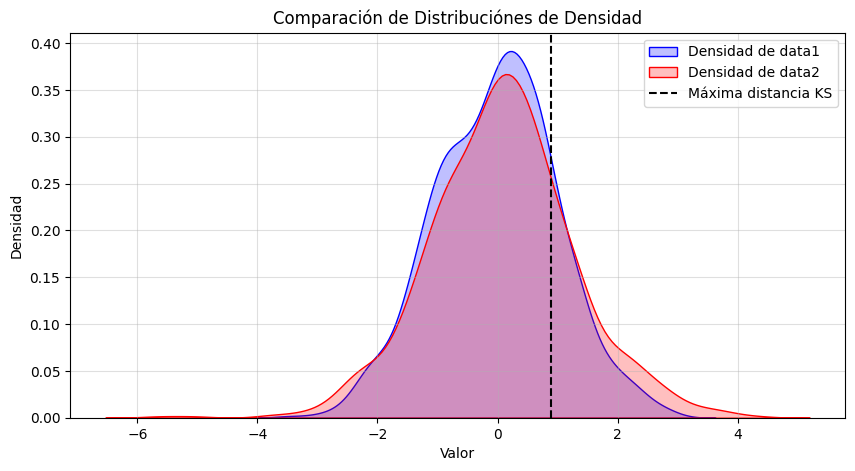

In [1010]:
ks_statistic, p_value = sps.ks_2samp(data1, data2)

# Obtener distribucion acumuladiva
x_vals = np.linspace(min(data1.min(), data2.min()), max(data1.max(), data2.max()), 1000)
cdf1 = np.array([np.mean(data1 <= x) for x in x_vals])
cdf2 = np.array([np.mean(data2 <= x) for x in x_vals])

# Entonctrar el ks
ks_index = np.argmax(np.abs(cdf1 - cdf2))
ks_x = x_vals[ks_index]
ks_y1 = cdf1[ks_index]
ks_y2 = cdf2[ks_index]

print(f"Estadístico KS: {ks_statistic:.2f}")
print(f"P-valor: {p_value:.2f}")
print(f"Punto donde ocurre la máxima diferencia KS: {ks_x:.2f}")

# Graficar CDF y Ks
plt.figure(figsize=(10,5))
plt.plot(x_vals, cdf1, label="CDF de data1", color="blue")
plt.plot(x_vals, cdf2, label="CDF de data2", color="red")
plt.vlines(ks_x, ks_y1, ks_y2, color="black", linestyle="dashed", label=f"Distancia KS: {ks_statistic:.3f}")
plt.scatter([ks_x], [ks_y1], color="blue", zorder=3)
plt.scatter([ks_x], [ks_y2], color="red", zorder=3)
plt.title("Prueba KS - Comparación de CDFs")
plt.xlabel("Valor")
plt.ylabel("Probabilidad acumulada")
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()

# Graficar la densidad y Ks
plt.figure(figsize=(10,5))
sns.kdeplot(data1, label="Densidad de data1", color="blue", shade=True)
sns.kdeplot(data2, label="Densidad de data2", color="red", shade=True)
plt.axvline(ks_x, color="black", linestyle="dashed", label=f"Máxima distancia KS")
plt.title("Comparación de Distribuciónes de Densidad")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()

## Experimentos a realizar

Se utilizará alguno de los experimentos del ejercicio anterior (con un valor p y N fijo), comparando la distribución obtenida del experimento contra una muestra generada aleatoriamente de la distribución geométrica.

Las distribuciones a comparar serán:

1. $ \text{Geom}(p) $
2. $ \text{Geom}(q) $, para $ q = 1.2p $ (asegurando que $ 0 < q < 1 $).

In [1011]:
# Ejercicio 1
np.random.seed(12345)
p = 0.65
N = 1000
results = []
q = min(1.2 * p, 0.99)

# Iterar N veces para encontrar el primer exito y guardarlo para graficar densidad
for _ in range(N):
  dist = sps.bernoulli.rvs(p, size=1000)
  first_success = np.where(dist == 1)[0][0] + 1
  results.append(first_success)

mu_exp = np.mean(results)
var_exp=np.var(results)

In [1012]:
# Generar muestras geométricas
muestra1 = sps.geom.rvs(p, size=N)
mu1=np.mean(muestra1)
var1=np.var(muestra1)

muestra2 = sps.geom.rvs(q, size=N)
mu2=np.mean(muestra2)
var2=np.var(muestra2)

In [1013]:
# Mostrar estadísticas descriptivas
print(f"Estadísticas para p = {p} y q = {q:.2f}:")
print(f"Experimento (p={p}): Media = {mu_exp:.2f}, Varianza = {var_exp:.2f}")
print(f"Geom(p={p}): Media = {mu1:.2f}, Varianza = {var1:.2f}")
print(f"Geom(q={q:.2f}): Media = {mu1:.2f}, Varianza = {var2:.2f}")

Estadísticas para p = 0.65 y q = 0.78:
Experimento (p=0.65): Media = 1.57, Varianza = 0.95
Geom(p=0.65): Media = 1.51, Varianza = 0.79
Geom(q=0.78): Media = 1.51, Varianza = 0.37


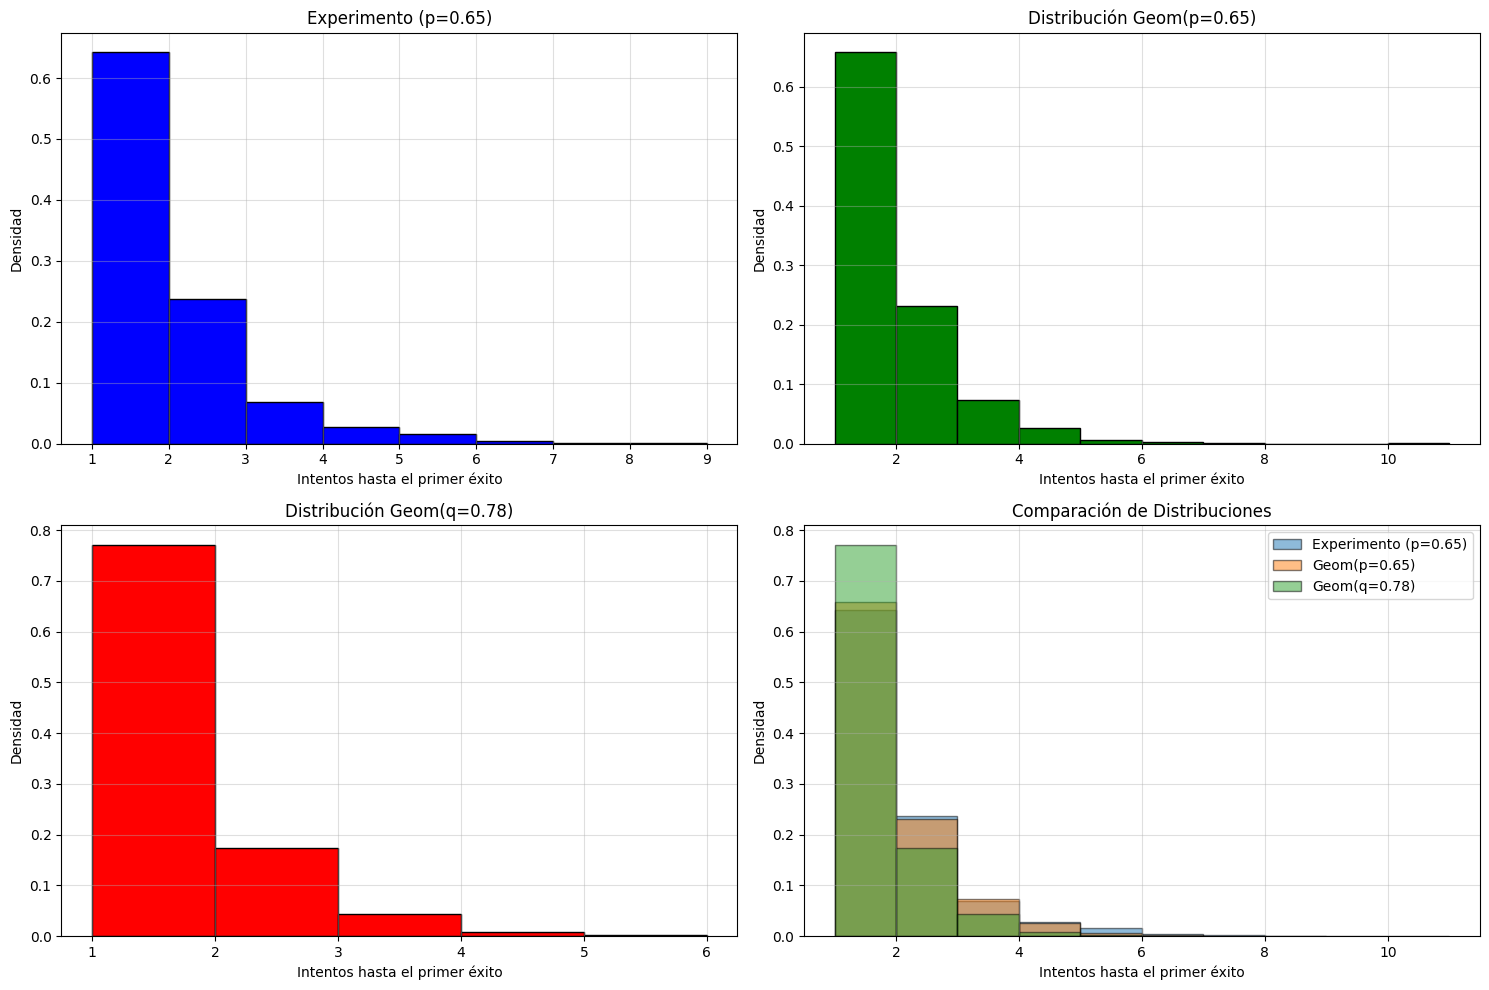

In [1014]:
# Nota se hace una cantidad de intervalos para que matplotlib no haga intervalos mas grandes; 
# y vaya de acuerdo a la cantidad de datos de cada muestra incluyendo el maximo en los datos

# Crear figura con 4 subgráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribución del experimento
axes[0, 0].hist(results, bins=range(1, max(results) + 2), density=True, edgecolor="black", color='blue')
axes[0, 0].set_title(f"Experimento (p={p})")
axes[0, 0].set_xlabel("Intentos hasta el primer éxito")
axes[0, 0].set_ylabel("Densidad")
axes[0, 0].grid(True, alpha=0.4)

# Distribución geométrica con p
axes[0, 1].hist(muestra1, bins=range(1, max(muestra1) + 2), density=True, edgecolor="black", color='green')
axes[0, 1].set_title(f"Distribución Geom(p={p})")
axes[0, 1].set_xlabel("Intentos hasta el primer éxito")
axes[0, 1].set_ylabel("Densidad")
axes[0, 1].grid(True, alpha=0.4)

# Distribución geométrica con q
axes[1, 0].hist(muestra2, bins=range(1, max(muestra2) + 2), density=True, edgecolor="black", color='red')
axes[1, 0].set_title(f"Distribución Geom(q={q:.2f})")
axes[1, 0].set_xlabel("Intentos hasta el primer éxito")
axes[1, 0].set_ylabel("Densidad")
axes[1, 0].grid(True, alpha=0.4)

# Comparación de todas las distribuciones
axes[1, 1].hist(results, bins=range(1, max(results) + 2), density=True, alpha=0.5, label=f"Experimento (p={p})", edgecolor="black")
axes[1, 1].hist(muestra1, bins=range(1, max(muestra1) + 2), density=True, alpha=0.5, label=f"Geom(p={p})", edgecolor="black")
axes[1, 1].hist(muestra2, bins=range(1, max(muestra2) + 2), density=True, alpha=0.5, label=f"Geom(q={q:.2f})", edgecolor="black")
axes[1, 1].set_title("Comparación de Distribuciones")
axes[1, 1].set_xlabel("Intentos hasta el primer éxito")
axes[1, 1].set_ylabel("Densidad")
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.4)

plt.tight_layout()
plt.show()